In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv('df_final.csv')

In [4]:
df = df.drop(columns=['Unnamed: 0'])
df.columns

Index(['retailer_code', 'reason', 'mos', 'resolved',
       'no_of_accounts_with_syf_13_march', 'account_balance_13_march',
       'account_status_13_march', 'card_activation_status_13_march',
       'eservice_ind_13_march', 'ebill_enrolled_status_13_march',
       'auto_pay_enrolled_status_13_march',
       'account_status_description_13_march',
       'current_delinquency_delinquency_history_13_march',
       'previous_delinquency_delinquency_history_13_march', 'date_time',
       'call_count', 'years_since_opened_full', 'no_of_accounts_with_syf_diff',
       'account_balance_diff', 'delinquency_history_diff',
       'account_status_diff', 'card_activation_status_diff',
       'eservice_ind_diff', 'ebill_enrolled_status_diff',
       'auto_pay_enrolled_status_diff'],
      dtype='object')

In [5]:
df = df.drop(columns=['mos'])
df.columns

Index(['retailer_code', 'reason', 'resolved',
       'no_of_accounts_with_syf_13_march', 'account_balance_13_march',
       'account_status_13_march', 'card_activation_status_13_march',
       'eservice_ind_13_march', 'ebill_enrolled_status_13_march',
       'auto_pay_enrolled_status_13_march',
       'account_status_description_13_march',
       'current_delinquency_delinquency_history_13_march',
       'previous_delinquency_delinquency_history_13_march', 'date_time',
       'call_count', 'years_since_opened_full', 'no_of_accounts_with_syf_diff',
       'account_balance_diff', 'delinquency_history_diff',
       'account_status_diff', 'card_activation_status_diff',
       'eservice_ind_diff', 'ebill_enrolled_status_diff',
       'auto_pay_enrolled_status_diff'],
      dtype='object')

In [6]:
y = df["resolved"]

In [7]:
y

0             floor
1          resolved
2          resolved
3             floor
4             floor
             ...   
1549145       floor
1549146    resolved
1549147    resolved
1549148    resolved
1549149       floor
Name: resolved, Length: 1549150, dtype: object

In [8]:
y = y.replace({'resolved': 0, 'floor': 1})
y

0          1
1          0
2          0
3          1
4          1
          ..
1549145    1
1549146    0
1549147    0
1549148    0
1549149    1
Name: resolved, Length: 1549150, dtype: int64

In [9]:
X = df.loc[:, df.columns != 'resolved']

In [10]:
X.dtypes

retailer_code                                         object
reason                                                object
no_of_accounts_with_syf_13_march                       int64
account_balance_13_march                             float64
account_status_13_march                               object
card_activation_status_13_march                        int64
eservice_ind_13_march                                  int64
ebill_enrolled_status_13_march                        object
auto_pay_enrolled_status_13_march                      int64
account_status_description_13_march                   object
current_delinquency_delinquency_history_13_march       int64
previous_delinquency_delinquency_history_13_march      int64
date_time                                             object
call_count                                             int64
years_since_opened_full                                int64
no_of_accounts_with_syf_diff                           int64
account_balance_diff    

In [11]:
X['date_time'] = pd.to_datetime(X['date_time'])

/var/folders/51/2p3ptcy15238wtsyvbb_xh_40000gn/T/ipykernel_41827/367572144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date_time'] = pd.to_datetime(X['date_time'])


In [12]:
X['retailer_code'] = X['retailer_code'].astype('category').cat.codes
X['ebill_enrolled_status_13_march'] = X['ebill_enrolled_status_13_march'].astype('category').cat.codes

/var/folders/51/2p3ptcy15238wtsyvbb_xh_40000gn/T/ipykernel_41827/3625187351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['retailer_code'] = X['retailer_code'].astype('category').cat.codes
/var/folders/51/2p3ptcy15238wtsyvbb_xh_40000gn/T/ipykernel_41827/3625187351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ebill_enrolled_status_13_march'] = X['ebill_enrolled_status_13_march'].astype('category').cat.codes


In [13]:
X.dtypes

retailer_code                                                  int8
reason                                                       object
no_of_accounts_with_syf_13_march                              int64
account_balance_13_march                                    float64
account_status_13_march                                      object
card_activation_status_13_march                               int64
eservice_ind_13_march                                         int64
ebill_enrolled_status_13_march                                 int8
auto_pay_enrolled_status_13_march                             int64
account_status_description_13_march                          object
current_delinquency_delinquency_history_13_march              int64
previous_delinquency_delinquency_history_13_march             int64
date_time                                            datetime64[ns]
call_count                                                    int64
years_since_opened_full                         

In [14]:
# Identify categorical columns (columns with dtype 'object')
categorical_columns = X.select_dtypes(include=['object']).columns

# Convert categorical columns to one-hot encoding
X = pd.get_dummies(X, columns=categorical_columns)

# Now X_encoded contains the original features along with the one-hot encoded categorical features
X

,retailer_code,no_of_accounts_with_syf_13_march,account_balance_13_march,card_activation_status_13_march,eservice_ind_13_march,ebill_enrolled_status_13_march,auto_pay_enrolled_status_13_march,current_delinquency_delinquency_history_13_march,previous_delinquency_delinquency_history_13_march,date_time,...,account_status_13_march_I,account_status_13_march_L,account_status_13_march_U,account_status_13_march_Z,account_status_description_13_march_Authorization Prohibited (open but on hold),account_status_description_13_march_Bankrupt (closed),account_status_description_13_march_Closed,account_status_description_13_march_Lost or Stolen (new account # issued),account_status_description_13_march_Open no restrictions,account_status_description_13_march_Unknown Status
0,4,2,143.28,0,1,0,0,0,0,2024-03-15 12:47:42,...,False,False,False,False,False,False,False,False,True,False
1,9,12,0.00,8,0,2,0,0,0,2024-03-17 11:42:37,...,False,False,False,False,False,False,False,False,True,False
2,4,2,44.98,0,0,1,0,0,0,2024-03-14 12:08:49,...,False,False,False,False,False,False,False,False,True,False
3,8,6,7.00,0,1,2,0,0,0,2024-03-14 14:59:02,...,False,False,False,False,False,False,False,False,True,False
4,8,6,7.00,0,1,2,0,0,0,2024-03-14 15:13:23,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549145,26,9,680.86,0,0,2,0,0,0,2024-03-14 08:01:17,...,False,False,False,False,False,False,False,False,True,False
1549146,33,14,1314.94,0,0,2,0,0,0,2024-03-14 12:01:18,...,False,False,False,False,False,False,False,False,True,False
1549147,33,14,1314.94,0,0,2,0,0,0,2024-03-14 12:03:36,...,False,False,False,False,False,False,False,False,True,False
1549148,25,7,35.66,0,0,2,0,0,0,2024-03-16 19:09:32,...,False,False,False,False,False,False,False,False,True,False


In [15]:
X.dtypes

retailer_code                                                                   int8
no_of_accounts_with_syf_13_march                                               int64
account_balance_13_march                                                     float64
card_activation_status_13_march                                                int64
eservice_ind_13_march                                                          int64
                                                                              ...   
account_status_description_13_march_Bankrupt (closed)                           bool
account_status_description_13_march_Closed                                      bool
account_status_description_13_march_Lost or Stolen (new account # issued)       bool
account_status_description_13_march_Open no restrictions                        bool
account_status_description_13_march_Unknown Status                              bool
Length: 104, dtype: object

In [16]:
X = X.astype(int)

In [17]:
X.columns

Index(['retailer_code', 'no_of_accounts_with_syf_13_march',
       'account_balance_13_march', 'card_activation_status_13_march',
       'eservice_ind_13_march', 'ebill_enrolled_status_13_march',
       'auto_pay_enrolled_status_13_march',
       'current_delinquency_delinquency_history_13_march',
       'previous_delinquency_delinquency_history_13_march', 'date_time',
       ...
       'account_status_13_march_I', 'account_status_13_march_L',
       'account_status_13_march_U', 'account_status_13_march_Z',
       'account_status_description_13_march_Authorization Prohibited (open but on hold)',
       'account_status_description_13_march_Bankrupt (closed)',
       'account_status_description_13_march_Closed',
       'account_status_description_13_march_Lost or Stolen (new account # issued)',
       'account_status_description_13_march_Open no restrictions',
       'account_status_description_13_march_Unknown Status'],
      dtype='object', length=104)

In [18]:
# Splitting the data into training and temporary set (60% training and 50% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=3407)

# Splitting the temporary set into validation and testing sets (50% validation and 50% testing for the subset)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=3407)

# Displaying the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (929490, 104)
X_val shape: (309830, 104)
X_test shape: (309830, 104)
y_train shape: (929490,)
y_val shape: (309830,)
y_test shape: (309830,)


In [21]:
def logistic_classification(X_train, y_train, X_val, y_val, X_test, y_test):
    # Define the parameter grid
    param_grid = {
        'penalty': ['l1'], 
        'solver': ['saga'],
        'C': [2],
        'max_iter': [500]
    }

    # Create logistic regression classifier
    classifier = LogisticRegression(random_state=42)

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='f1_weighted')
    grid_search.fit(X_train, y_train)

    # Get the best classifier from grid search
    best_classifier = grid_search.best_estimator_

    # Print the best parameters found by grid search
    print("Best Parameters:", grid_search.best_params_)

    # Fit the best classifier on the training data
    best_classifier.fit(X_train, y_train)

    # Compute and print accuracy on the validation data
    val_predictions = best_classifier.predict(X_val)
    val_accuracy = np.mean(val_predictions == y_val)
    print('\nValidation accuracy:', format(100 * val_accuracy, '.4f'))

    # Compute and print the confusion matrix for validation data
    cm_val = confusion_matrix(y_val, val_predictions)
    print('\nConfusion Matrix (Validation):')
    print(cm_val)

    # Compute and print F1 score on the validation data
    val_f1 = f1_score(y_val, val_predictions, average='weighted')
    print('\nF1 Score (Validation):', format(val_f1, '.4f'))

    # Compute and print accuracy on the test data
    test_predictions = best_classifier.predict(X_test)
    test_accuracy = np.mean(test_predictions == y_test)
    print('\nTesting accuracy:', format(100 * test_accuracy, '.4f'))

    # Compute and print the confusion matrix for test data
    cm_test = confusion_matrix(y_test, test_predictions)
    print('\nConfusion Matrix (Test):')
    print(cm_test)

    # Compute and print F1 score on the test data
    test_f1 = f1_score(y_test, test_predictions, average='weighted')
    print('\nF1 Score (Test):', format(test_f1, '.4f'))

    return best_classifier

In [22]:
# Example usage
best_classifier = logistic_classification(X_train, y_train, X_val, y_val, X_test, y_test)

Best Parameters: {'C': 2, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}

Validation accuracy: 80.1336

Confusion Matrix (Validation):
[[248278      0]
 [ 61552      0]]

F1 Score (Validation): 0.7130

Testing accuracy: 80.1772

Confusion Matrix (Test):
[[248413      0]
 [ 61417      0]]

F1 Score (Test): 0.7136


In [23]:
best_classifier

LogisticRegression(C=2, max_iter=500, penalty='l1', random_state=42,
                   solver='saga')

In [24]:
%pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /private/var/folders/51/2p3ptcy15238wtsyvbb_xh_40000gn/T/pip-install-6u55mqkf/alepython_9e959f658375485db8def81e496c846d
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /private/var/folders/51/2p3ptcy15238wtsyvbb_xh_40000gn/T/pip-install-6u55mqkf/alepython_9e959f658375485db8def81e496c846d
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [19]:
from PyALE import ale

In [20]:
X.head()

,retailer_code,no_of_accounts_with_syf_13_march,account_balance_13_march,card_activation_status_13_march,eservice_ind_13_march,ebill_enrolled_status_13_march,auto_pay_enrolled_status_13_march,current_delinquency_delinquency_history_13_march,previous_delinquency_delinquency_history_13_march,date_time,...,account_status_13_march_I,account_status_13_march_L,account_status_13_march_U,account_status_13_march_Z,account_status_description_13_march_Authorization Prohibited (open but on hold),account_status_description_13_march_Bankrupt (closed),account_status_description_13_march_Closed,account_status_description_13_march_Lost or Stolen (new account # issued),account_status_description_13_march_Open no restrictions,account_status_description_13_march_Unknown Status
0,4,2,143,0,1,0,0,0,0,1710506862000000000,...,0,0,0,0,0,0,0,0,1,0
1,9,12,0,8,0,2,0,0,0,1710675757000000000,...,0,0,0,0,0,0,0,0,1,0
2,4,2,44,0,0,1,0,0,0,1710418129000000000,...,0,0,0,0,0,0,0,0,1,0
3,8,6,7,0,1,2,0,0,0,1710428342000000000,...,0,0,0,0,0,0,0,0,1,0
4,8,6,7,0,1,2,0,0,0,1710429203000000000,...,0,0,0,0,0,0,0,0,1,0


In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
model = RandomForestRegressor(random_state=1345)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1345)

In [23]:
X_train.head()

,retailer_code,no_of_accounts_with_syf_13_march,account_balance_13_march,card_activation_status_13_march,eservice_ind_13_march,ebill_enrolled_status_13_march,auto_pay_enrolled_status_13_march,current_delinquency_delinquency_history_13_march,previous_delinquency_delinquency_history_13_march,date_time,...,account_status_13_march_I,account_status_13_march_L,account_status_13_march_U,account_status_13_march_Z,account_status_description_13_march_Authorization Prohibited (open but on hold),account_status_description_13_march_Bankrupt (closed),account_status_description_13_march_Closed,account_status_description_13_march_Lost or Stolen (new account # issued),account_status_description_13_march_Open no restrictions,account_status_description_13_march_Unknown Status
1081172,25,3,0,0,0,2,0,0,0,1710588815000000000,...,0,0,0,0,0,0,0,0,1,0
634302,8,10,61,0,0,2,0,0,0,1710445483000000000,...,0,0,0,0,0,0,0,0,1,0
918294,25,3,0,0,0,2,0,0,0,1710687082000000000,...,0,0,0,0,0,0,0,0,1,0
308780,1,3,463,0,1,2,1,0,0,1710666169000000000,...,0,0,0,0,0,0,0,0,1,0
1149143,29,1,1614,0,0,2,0,0,0,1710691067000000000,...,0,0,0,0,0,0,0,0,1,0


In [28]:
X_train.columns

Index(['retailer_code', 'no_of_accounts_with_syf_13_march',
       'account_balance_13_march', 'card_activation_status_13_march',
       'eservice_ind_13_march', 'ebill_enrolled_status_13_march',
       'auto_pay_enrolled_status_13_march',
       'current_delinquency_delinquency_history_13_march',
       'previous_delinquency_delinquency_history_13_march', 'date_time',
       ...
       'account_status_13_march_I', 'account_status_13_march_L',
       'account_status_13_march_U', 'account_status_13_march_Z',
       'account_status_description_13_march_Authorization Prohibited (open but on hold)',
       'account_status_description_13_march_Bankrupt (closed)',
       'account_status_description_13_march_Closed',
       'account_status_description_13_march_Lost or Stolen (new account # issued)',
       'account_status_description_13_march_Open no restrictions',
       'account_status_description_13_march_Unknown Status'],
      dtype='object', length=104)

PyALE._ALE_generic:INFO: Continuous feature detected.


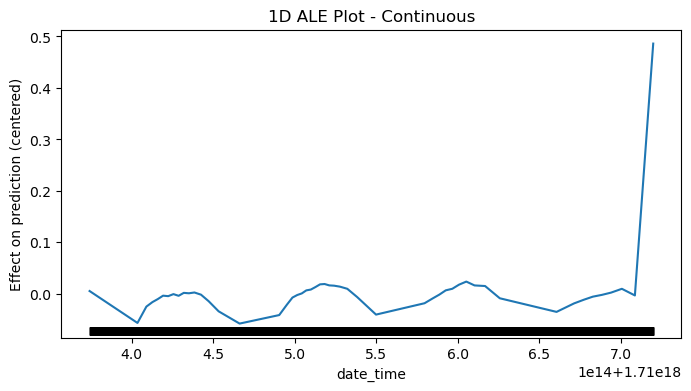

In [34]:
ale_eff = ale(
    X=X_train, model=model, feature=["date_time"], grid_size=50, include_CI=False
)

PyALE._ALE_generic:INFO: Discrete feature detected.


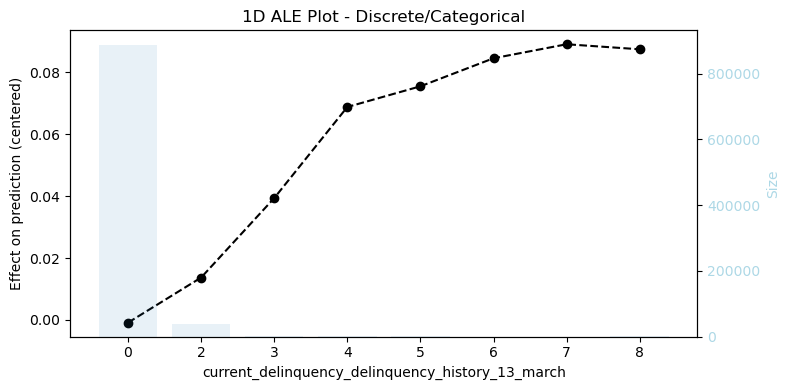

In [29]:
ale_eff = ale(
    X=X_train, model=model, feature=["current_delinquency_delinquency_history_13_march"], grid_size=50, include_CI=False
)

PyALE._ALE_generic:INFO: Discrete feature detected.


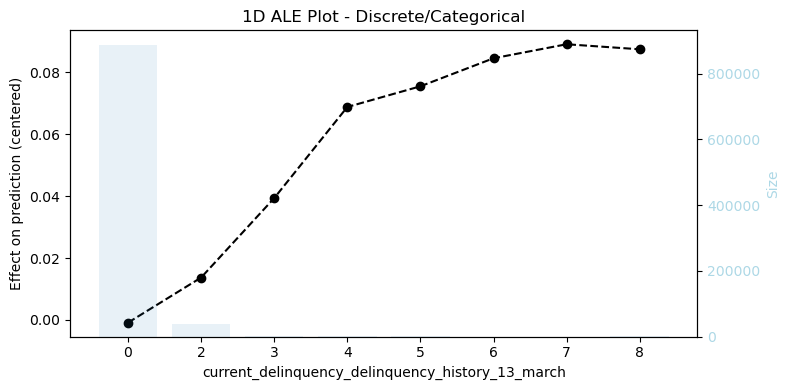

In [30]:
ale_eff = ale(
    X=X_train, model=model, feature=["current_delinquency_delinquency_history_13_march"], grid_size=50, include_CI=False
)

PyALE._ALE_generic:INFO: Discrete feature detected.


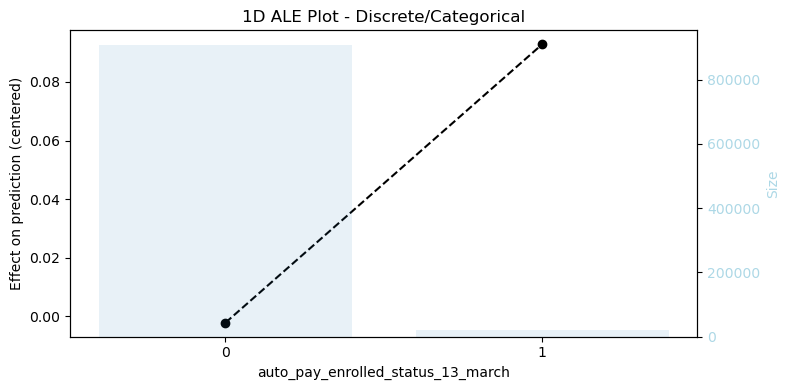

In [31]:
ale_eff = ale(
    X=X_train, model=model, feature=["auto_pay_enrolled_status_13_march"], grid_size=50, include_CI=False
)

PyALE._ALE_generic:INFO: Discrete feature detected.


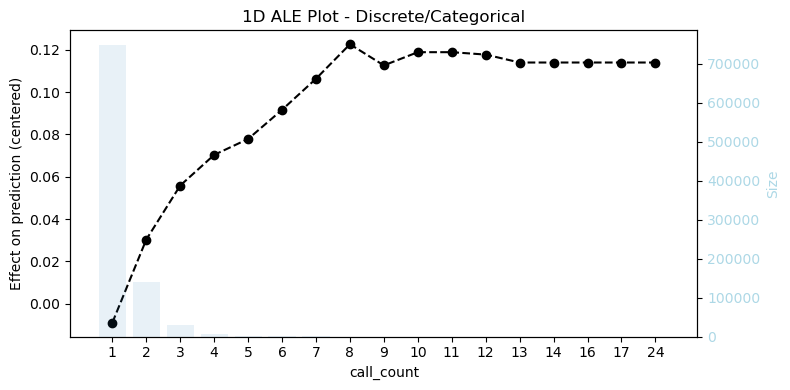

In [35]:
ale_eff = ale(
    X=X_train, model=model, feature=["call_count"], grid_size=50, include_CI=False
)

PyALE._ALE_generic:INFO: Discrete feature detected.


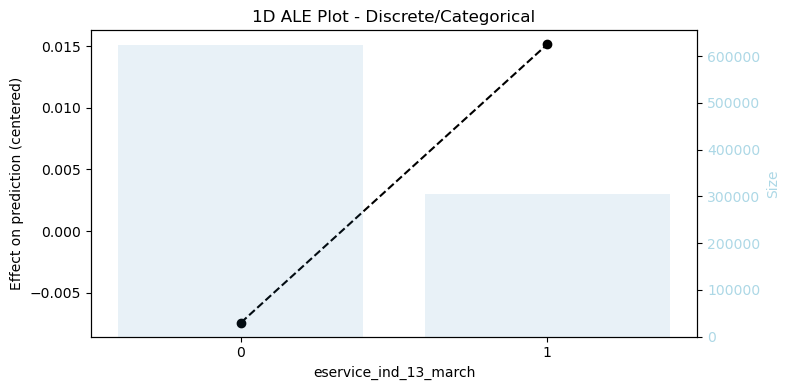

In [32]:
ale_eff = ale(
    X=X_train, model=model, feature=["eservice_ind_13_march"], grid_size=50, include_CI=False
)

PyALE._ALE_generic:INFO: Discrete feature detected.


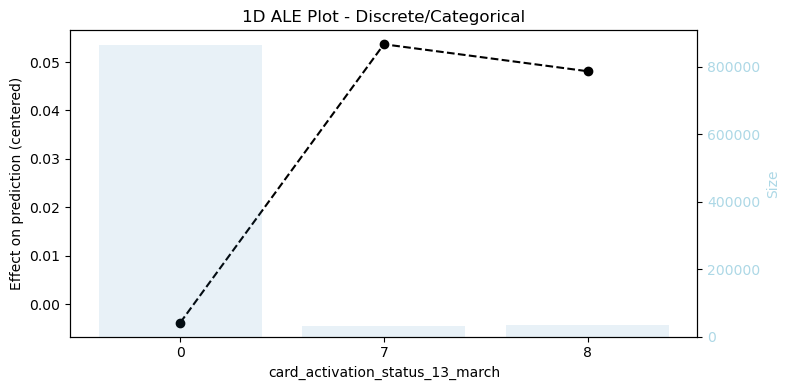

In [33]:
ale_eff = ale(
    X=X_train, model=model, feature=["card_activation_status_13_march"], grid_size=50, include_CI=False
)

PyALE._ALE_generic:INFO: Continuous feature detected.


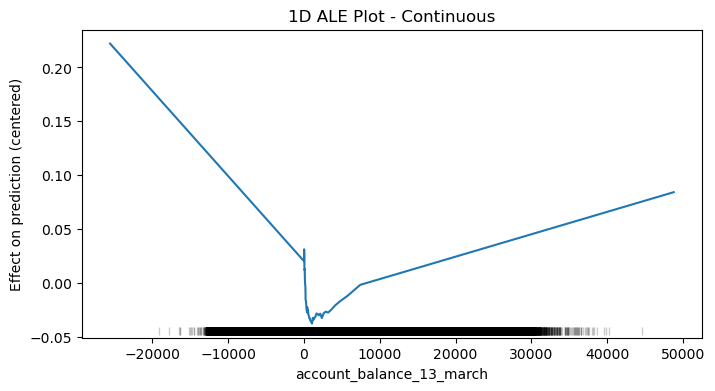

In [27]:
ale_eff = ale(
    X=X_train, model=model, feature=["account_balance_13_march"], grid_size=50, include_CI=False
)

PyALE._ALE_generic:INFO: Discrete feature detected.


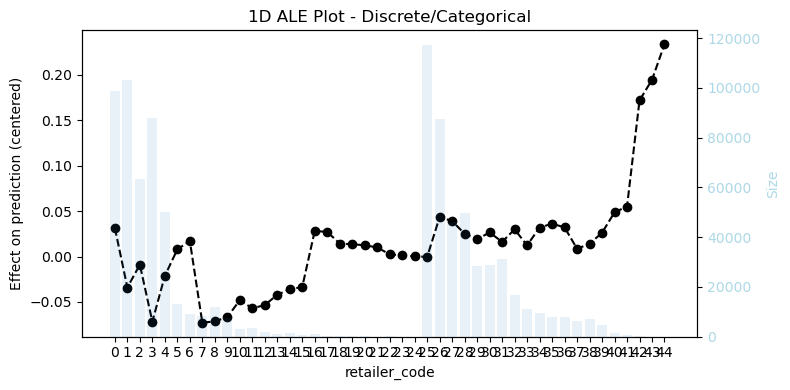

In [25]:
ale_eff = ale(
    X=X_train, model=model, feature=["retailer_code"], grid_size=50, include_CI=False
)

PyALE._ALE_generic:INFO: Discrete feature detected.


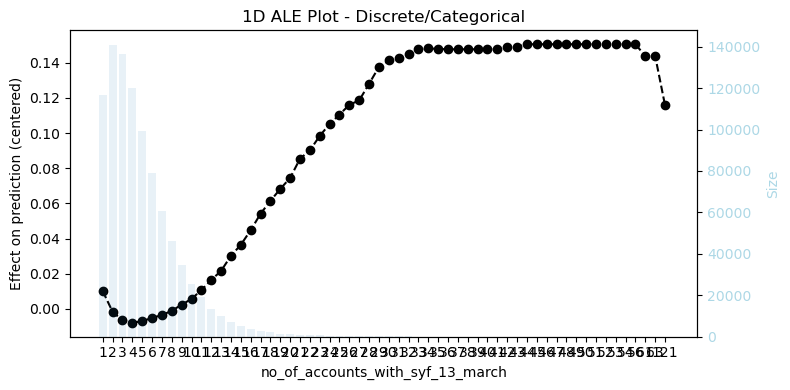

In [26]:
ale_eff = ale(
    X=X_train, model=model, feature=["no_of_accounts_with_syf_13_march"], grid_size=50, include_CI=False
)

In [ ]:
ale_eff = ale(
    X=X_train, model=model, feature=["date_time"], grid_size=50, include_CI=False
)